# Backend and Working

In [ ]:
pip install spotipy

Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohanrao/formula-1-world-championship-1950-2020")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rohanrao/formula-1-world-championship-1950-2020/versions/24


F1 Dataframe

In [ ]:
import pandas as pd
import os

# Define the path to the folder containing your data files
folder_path = '/root/.cache/kagglehub/datasets/rohanrao/formula-1-world-championship-1950-2020/versions/24/'

# Get a list of all files in the specified folder
all_files = os.listdir(folder_path)

# Iterate through the files
for filename in all_files:
    # Construct the full path to the file
    file_path = os.path.join(folder_path, filename)

    try:
        # Read the file into a pandas DataFrame (attempt to read as CSV)
        df = pd.read_csv(file_path)

        # Create a variable name from the filename (remove any extension and make it a valid Python identifier)
        base_name = os.path.splitext(filename)[0]  # Get filename without extension
        variable_name = base_name.replace(' ', '_').replace('-', '_')

        # Assign the DataFrame to a variable with the generated name
        globals()[variable_name] = df

        print(f"Successfully created DataFrame: {variable_name} for file: {filename}")

    except FileNotFoundError:
        print(f"Error: File not found at path: {file_path}")
    except pd.errors.EmptyDataError:
        print(f"Warning: File '{filename}' is empty and could not be read into a DataFrame.")
    except pd.errors.ParserError as e:
        print(f"Warning: Error parsing CSV file '{filename}': {e}")
    except Exception as e:
        print(f"Warning: Could not read file '{filename}' as a DataFrame: {e}")

# You can now access your DataFrames directly by their generated variable names
# For example, if you have a file named 'races', you can access its DataFrame as 'races'
# If you have 'race results', it will be accessible as 'race_results'

Successfully created DataFrame: constructor_results for file: constructor_results.csv
Successfully created DataFrame: results for file: results.csv
Successfully created DataFrame: qualifying for file: qualifying.csv
Successfully created DataFrame: status for file: status.csv
Successfully created DataFrame: seasons for file: seasons.csv
Successfully created DataFrame: sprint_results for file: sprint_results.csv
Successfully created DataFrame: lap_times for file: lap_times.csv
Successfully created DataFrame: driver_standings for file: driver_standings.csv
Successfully created DataFrame: drivers for file: drivers.csv
Successfully created DataFrame: pit_stops for file: pit_stops.csv
Successfully created DataFrame: circuits for file: circuits.csv
Successfully created DataFrame: constructors for file: constructors.csv
Successfully created DataFrame: races for file: races.csv
Successfully created DataFrame: constructor_standings for file: constructor_standings.csv


Drivers with playlists

In [ ]:
# prompt: create a new dataframe with the information from drivers that contains their driver id, driver ref, and code

drivers_subset = drivers[['driverId', 'driverRef', 'code']]
only_playlists = drivers_subset[(drivers_subset.get("code") == 'HAM') |
               (drivers_subset.get("code") == 'NOR') |
               (drivers_subset.get("code") == 'VER') |
               (drivers_subset.get("code") == 'RIC') |
               (drivers_subset.get("code") == 'ZHO') |
               (drivers_subset.get("code") == 'SAI') |
               (drivers_subset.get("code") == 'LEC') |
               (drivers_subset.get("code") == 'MSC') |
               (drivers_subset.get("code") == 'PER') |
               (drivers_subset.get("code") == 'GAS') |
               (drivers_subset.get("code") == 'STR')]
only_playlists = only_playlists.reset_index()
only_playlists = only_playlists.drop(only_playlists.index[1])
only_playlists = only_playlists.drop(only_playlists.index[4])
only_playlists = only_playlists.drop(only_playlists.index[5])
only_playlists = only_playlists.drop(only_playlists.index[9]).reset_index().drop(columns = ['index', 'level_0'])
only_playlists

,driverId,driverRef,code
0,1,hamilton,HAM
1,842,gasly,GAS
2,815,perez,PER
3,817,ricciardo,RIC
4,830,max_verstappen,VER
5,840,stroll,STR
6,844,leclerc,LEC
7,846,norris,NOR
8,854,mick_schumacher,MSC


Identify races after 2018

In [ ]:
# prompt: make a new dataframe using the races dataframe and get the raceid, circuitid, name, and date.

races_subset = races[['raceId', 'circuitId', 'name', 'year']]
races_subset = races_subset[races_subset.get("year") >= 2018].reset_index().drop(columns = ['index'])
races_subset

,raceId,circuitId,name,year
0,989,1,Australian Grand Prix,2018
1,990,3,Bahrain Grand Prix,2018
2,991,17,Chinese Grand Prix,2018
3,992,73,Azerbaijan Grand Prix,2018
4,993,4,Spanish Grand Prix,2018
...,...,...,...,...
144,1140,32,Mexico City Grand Prix,2024
145,1141,18,São Paulo Grand Prix,2024
146,1142,80,Las Vegas Grand Prix,2024
147,1143,78,Qatar Grand Prix,2024


Only viable races

In [ ]:
# prompt: make a dataframe from the lap times dataframe using only the driver ids available in only_playlists and and the race ids available in races_subset

lap_times_subset = lap_times[lap_times['driverId'].isin(only_playlists['driverId'])]
lap_times_subset = lap_times_subset[lap_times_subset['raceId'].isin(races_subset['raceId'])]
lap_times_subset

,raceId,driverId,lap,position,time,milliseconds
426694,989,844,58,13,1:29.944,89944
426695,989,844,57,13,1:29.001,89001
426696,989,844,56,13,1:28.759,88759
426697,989,844,55,13,1:29.003,89003
426698,989,844,54,13,1:28.985,88985
...,...,...,...,...,...,...
588734,1144,1,54,5,1:27.342,87342
588735,1144,1,55,5,1:27.398,87398
588736,1144,1,56,5,1:27.738,87738
588737,1144,1,57,5,1:27.751,87751


Converted to numericals

In [ ]:
# prompt: write a function that takes the string in the time column in lap_times and converts the value into seconds and stores it as an integer

def convert_time_to_seconds(time_str):
    """Converts a time string in the format 'MM:SS.SSS' to seconds as an integer.

    Args:
        time_str: The time string to convert.

    Returns:
        The time in seconds as an integer, or None if the input is invalid.
    """
    try:
        minutes, seconds = time_str.split(':')
        total_seconds = int(minutes) * 60 + float(seconds)
        return float(total_seconds)
    except (ValueError, AttributeError):
        return None

# Apply the function to the 'time' column
lap_times_subset['time_seconds'] = lap_times_subset['time'].apply(convert_time_to_seconds)
lap_times_simple = lap_times_subset.drop(columns = ['lap', 'position', 'time', 'milliseconds'])
lap_times_simple

,raceId,driverId,time_seconds
426694,989,844,89.944
426695,989,844,89.001
426696,989,844,88.759
426697,989,844,89.003
426698,989,844,88.985
...,...,...,...
588734,1144,1,87.342
588735,1144,1,87.398
588736,1144,1,87.738
588737,1144,1,87.751


Grouped

In [ ]:
# prompt: group laptimessubset1 by race then driver id and use mean

# Group by race, then driverId, and calculate the mean of 'time_seconds'
grouped_lap_times = lap_times_simple.reset_index().drop(columns=['index'])
grouped_lap_times

,raceId,driverId,time_seconds
0,989,844,89.944
1,989,844,89.001
2,989,844,88.759
3,989,844,89.003
4,989,844,88.985
...,...,...,...
65487,1144,1,87.342
65488,1144,1,87.398
65489,1144,1,87.738
65490,1144,1,87.751


Songs accumulation

In [ ]:
import os
import pandas as pd
import kagglehub


# Download latest version of the dataset
path = kagglehub.dataset_download("brunoalarcon123/top-200-spotify-songs-dataset")


print("📁 Path to dataset files:", path)


# List all files in the downloaded dataset directory
all_files = os.listdir(path)


# Placeholder for the main dataset we want (Spotify_Dataset_V3.csv)
top_200_df = None


# Loop through each file and try loading the one we want
for filename in all_files:
   file_path = os.path.join(path, filename)


   try:
       # Read with semicolon delimiter to handle one-column issue
       df = pd.read_csv(file_path, sep=';', on_bad_lines='skip')


       # Identify and store the one with the right format
       if 'Spotify_Dataset_V3' in filename:
           top_200_df = df
           print(f"✅ Loaded '{filename}' as `top_200_df`")
       else:
           print(f"ℹ️ Skipped: {filename}")


   except FileNotFoundError:
       print(f"❌ File not found: {file_path}")
   except pd.errors.EmptyDataError:
       print(f"⚠️ Empty file: {filename}")
   except pd.errors.ParserError as e:
       print(f"⚠️ Parse error in '{filename}': {e}")
   except Exception as e:
       print(f"⚠️ Failed to load '{filename}': {e}")


# Preview the DataFrame (optional)
if top_200_df is not None:
   print("🧠 Columns in top_200_df:", top_200_df.columns.tolist())
   top_200_df
else:
   print("❌ No valid DataFrame loaded as top_200_df.")

📁 Path to dataset files: /root/.cache/kagglehub/datasets/brunoalarcon123/top-200-spotify-songs-dataset/versions/4
✅ Loaded 'Spotify_Dataset_V3.csv' as `top_200_df`
🧠 Columns in top_200_df: ['Rank', 'Title', 'Artists', 'Date', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence', '# of Artist', 'Artist (Ind.)', '# of Nationality', 'Nationality', 'Continent', 'Points (Total)', 'Points (Ind for each Artist/Nat)', 'id', 'Song URL']


In [ ]:

import os
import pandas as pd
import kagglehub


# Download latest version of the dataset
path = kagglehub.dataset_download("rodolfofigueroa/spotify-12m-songs")


print("📁 Path to dataset files:", path)


# List all files in the downloaded dataset directory
all_files = os.listdir(path)


# Placeholder for the DataFrame we want
m1_2m_df = None


# Loop through each file and try loading it
for filename in all_files:
   file_path = os.path.join(path, filename)


   try:
       # Try reading as CSV
       df = pd.read_csv(file_path)


       # Identify and store the main dataset
       if 'csv' in filename.lower():
           big_song_df = df
           print(f"✅ Loaded '{filename}' as `big_song_df`")
       else:
           print(f"ℹ️ Skipped: {filename}")


   except FileNotFoundError:
       print(f"❌ File not found: {file_path}")
   except pd.errors.EmptyDataError:
       print(f"⚠️ Empty file: {filename}")
   except pd.errors.ParserError as e:
       print(f"⚠️ Parse error in '{filename}': {e}")
   except Exception as e:
       print(f"⚠️ Failed to load '{filename}': {e}")


# Preview the DataFrame (optional)
if big_song_df is not None:
   print("🧠 Columns in big_song_df:", big_song_df.columns.tolist())
   big_song_df

📁 Path to dataset files: /root/.cache/kagglehub/datasets/rodolfofigueroa/spotify-12m-songs/versions/1
✅ Loaded 'tracks_features.csv' as `big_song_df`
🧠 Columns in big_song_df: ['id', 'name', 'album', 'album_id', 'artists', 'artist_ids', 'track_number', 'disc_number', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'year', 'release_date']


In [ ]:
top_200_df

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651931,197,Oh Lord,MiC LOWRY,01/01/2017,0.273,0.794,-6644.0,0.068,0.022,0.000,0.377,Artist 1,MiC LOWRY,Nationality 1,United Kingdom,Europe,4,4.0,1sTUEdVO85YU8Ymk2jeAls,https://open.spotify.com/track/1sTUEdVO85YU8Ym...
651932,198,Superstition - Single Version,Stevie Wonder,01/01/2017,0.650,0.658,-10908.0,0.085,0.089,0.004,0.883,Artist 1,Stevie Wonder,Nationality 1,United States,Anglo-America,3,3.0,5lXcSvHRVjQJ3LB2rLKQog,https://open.spotify.com/track/5lXcSvHRVjQJ3LB...
651933,199,Secrets,The Weeknd,01/01/2017,0.665,0.771,-5779.0,0.053,0.016,0.000,0.764,Artist 1,The Weeknd,Nationality 1,Canada,Anglo-America,2,2.0,3DX4Y0egvc0slLcLl31h2p,https://open.spotify.com/track/3DX4Y0egvc0slLc...
651934,200,Ni**as In Paris,"JAY-Z, Kanye West",01/01/2017,0.757,0.882,-6125.0,0.248,0.076,0.000,0.684,Artist 1,JAY-Z,Nationality 1,United States,Anglo-America,1,1.0,2KpCpk6HjXXLb7nnXoXA5O,https://open.spotify.com/track/2KpCpk6HjXXLb7n...


Combine dataframes

In [ ]:
import pandas as pd


# Example: do an outer join so you keep all ids from both DataFrames
merged = pd.merge(top_200_df, big_song_df, on='id', how='outer', suffixes=('_top', '_big'))


# Build a final DataFrame selecting/combining the columns you care about:
combined = pd.DataFrame({
   'id': merged['id'],
   # For Title, use top_200_df's Title if not null, otherwise fall back on big_song_df's name
   'Title': merged['Title'].fillna(merged['name']),  # Changed 'name_big' to 'name'
   # For Artist, use top_200_df's Artists if not null, otherwise fall back on big_song_df's artists
   'Artist': merged['Artists'].fillna(merged['artists']),
   # Audio features: pick the non-null values between the two
   'danceability': merged['Danceability'].fillna(merged['danceability']),
   'energy': merged['Energy'].fillna(merged['energy']),
   'loudness': merged['Loudness'].fillna(merged['loudness']),
   'speechiness': merged['Speechiness'].fillna(merged['speechiness']),
   'acousticness': merged['Acousticness'].fillna(merged['acousticness']),
   'instrumentalness': merged['Instrumentalness'].fillna(merged['instrumentalness']),
   'valence': merged['Valence'].fillna(merged['valence'])
})

combined = combined.drop_duplicates(subset='id', keep='first')
combined

,id,Title,Artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence
0,0001Lyv0YTjkZSqzT4WkLy,Eye Of The Hurricane,"['Half Japanese', 'Ira Kaplan']",0.490,0.9120,-11.245,0.0522,0.261000,0.012800,0.1150
1,0001Wtl60puR26ZtSDIF66,Shikestei Fars,['Khan Sushinksky'],0.296,0.4140,-12.480,0.0491,0.739000,0.151000,0.4950
2,0006YMdmPphDXTlUBHGr6Q,Bent Finger Boogie,['Matt Gray'],0.499,0.3190,-11.199,0.0364,0.945000,0.883000,0.7890
3,0007ViJ9W2YqgQX7zDic82,"Ceremony II (""Incantations"")","['Paul Chihara', 'Paul Lustig Dunkel', 'Richar...",0.139,0.0698,-24.639,0.0553,0.988000,0.700000,0.0354
4,000B6fUCVkSThxEbewDZ8r,Fight or Flight,['Haunt'],0.419,0.9270,-6.035,0.1310,0.000585,0.000079,0.2570
...,...,...,...,...,...,...,...,...,...,...
1854354,7zzv3S4N9GzY2fo2d70ecQ,American Girl,['Saints Of The Underground'],0.544,0.9470,-6.110,0.0433,0.000027,0.015300,0.5550
1854355,7zzvM7oBTJbb5LPRj8pNmh,Cold City,['Mia'],0.832,0.3270,-11.585,0.1320,0.016300,0.747000,0.2450
1854356,7zzwQwN3jNiK46B2M9kL2Q,Deion's House,['Black Milk'],0.480,0.8990,-6.698,0.3830,0.295000,0.000676,0.4660
1854357,7zzx1uuOzd46MHEX4mRyHu,Under the Weight,['Wild Carnation'],0.461,0.6360,-6.619,0.0382,0.378000,0.006650,0.2370


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import re

# 🔐 Replace these with your credentials
client_id = "f4e9f3f754154702b0c8b0f891ebb31e"
client_secret = "ff1843ca93314b428e4a9ec4f70a63c4"
redirect_uri = "http://127.0.0.1:8888/callback"

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id="f4e9f3f754154702b0c8b0f891ebb31e",
    client_secret="ff1843ca93314b428e4a9ec4f70a63c4"
))

def get_playlist_tracks(url):

  def playlist_id_from_url(url):
    return url.split("playlist/")[-1].split("?")[0]

  playlist_id = playlist_id_from_url(url)
  # load the first 100 songs
  tracks = []
  result = sp.playlist_items(playlist_id, additional_types=['track'])
  tracks.extend(result['items'])

  # if playlist is larger than 100 songs, continue loading it until end
  while result['next']:
      result = sp.next(result)
      tracks.extend(result['items'])

  # remove all local songs
  i = 0  # just for counting how many tracks are local
  for item in tracks:
      if item['is_local']:
          tracks.remove(item)
          i += 1
  results = []

  for item in tracks:
      track = item.get('track')
      if track:
          name = track.get('name', 'Unknown Track')
          artists = ', '.join([artist['name'] for artist in track.get('artists', [])])
          uri = track.get('uri', 'No URI')
          results.append({'name': name, 'artists': artists, 'uri': uri})
  results = pd.DataFrame(results)
  results['uri'] = results['uri'].str.replace('spotify:track:', '', regex=False)
  return results

In [ ]:
playlists = ["https://open.spotify.com/playlist/6BDeKQxNlBLU5YXVR39EyE?si=1b6b2133be8445b9",
             "https://open.spotify.com/playlist/51OjIWVsdAOq4GdCAAfjRr?si=7279121a620f44ae",
             "https://open.spotify.com/playlist/6iSp72jBfRxzsdmAbjOQUu?si=e9ea00659dd74ed3",
             "https://open.spotify.com/playlist/3C0BPyRGYYotz18qaPbe9n?si=d7008322c1c04643",
             "https://open.spotify.com/playlist/5AzvIJaPfuLYwai67PXgrj?si=uHmdtfKvSZOn4PbKNnrKoA",
             "https://open.spotify.com/playlist/6PZQ9aG39iQskrEiXAURzR?si=ffceeb715f3248d2",
             "https://open.spotify.com/playlist/4XKqSFRm9AbbmOvJkilqnq?si=b1465b41db854fa1",
             "https://open.spotify.com/playlist/4l0DUAUhKwn4tmYzNeKycy?si=QKtsix1nQ12750wGfFj0Hw",
             "https://open.spotify.com/playlist/6QDoLKPxoV1BbLPHxrUwdk?si=c0c11bfc6f0d444d"]

In [ ]:
only_playlists['playlists'] = playlists[:len(grouped_lap_times)]
only_playlists

,driverId,driverRef,code,playlists
0,1,hamilton,HAM,https://open.spotify.com/playlist/6BDeKQxNlBLU...
1,842,gasly,GAS,https://open.spotify.com/playlist/51OjIWVsdAOq...
2,815,perez,PER,https://open.spotify.com/playlist/6iSp72jBfRxz...
3,817,ricciardo,RIC,https://open.spotify.com/playlist/3C0BPyRGYYot...
4,830,max_verstappen,VER,https://open.spotify.com/playlist/5AzvIJaPfuLY...
5,840,stroll,STR,https://open.spotify.com/playlist/6PZQ9aG39iQs...
6,844,leclerc,LEC,https://open.spotify.com/playlist/4XKqSFRm9Abb...
7,846,norris,NOR,https://open.spotify.com/playlist/4l0DUAUhKwn4...
8,854,mick_schumacher,MSC,https://open.spotify.com/playlist/6QDoLKPxoV1B...


Process the playlists

In [ ]:
# prompt: for each playlist link in the playlists array, apply the get_playlist_tracks function, then summarize all of the columns by their mean values and create a dictionary. using this dictionary and the playlists array, create a dataframe of the playlist values followed by the average feature values

import pandas as pd

def process_playlists(playlists, combined_df, expanded_lap_times):
    playlist_data = []
    for playlist_url in playlists:
        try:
            playlist_tracks = get_playlist_tracks(playlist_url)
            merged_data = playlist_tracks.merge(combined_df, left_on='uri', right_on='id')
            merged_data = merged_data.drop(columns=['uri', 'name', 'artists', 'id', 'Title', 'Artist'])
            # Calculate the mean of numerical columns
            mean_values = merged_data.mean().to_dict()
            playlist_data.append(mean_values)
        except Exception as e:
            print(f"Error processing playlist {playlist_url}: {e}")
            playlist_data.append({col: None for col in combined_df.columns if combined_df[col].dtype != 'object'})

    playlist_df = pd.DataFrame(playlist_data)
    final_df = pd.concat([only_playlists, playlist_df], axis=1)
    return final_df

# Example usage (assuming 'playlists', 'combined', and 'expanded_lap_times' are defined)
all_stats_df = process_playlists(playlists, combined, grouped_lap_times)
all_stats_df

,driverId,driverRef,code,playlists,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence
0,1,hamilton,HAM,https://open.spotify.com/playlist/6BDeKQxNlBLU...,0.752700,0.619200,-5407.863700,0.229050,0.094940,8.250000e-07,0.349350
1,842,gasly,GAS,https://open.spotify.com/playlist/51OjIWVsdAOq...,0.750778,0.685667,-2379.390222,0.094489,0.169513,1.601003e-01,0.611778
2,815,perez,PER,https://open.spotify.com/playlist/6iSp72jBfRxz...,0.700083,0.616083,-3764.140750,0.057542,0.291167,3.175333e-03,0.543667
3,817,ricciardo,RIC,https://open.spotify.com/playlist/3C0BPyRGYYot...,0.657250,0.490250,-1760.415000,0.130375,0.373518,3.649598e-02,0.496000
4,830,max_verstappen,VER,https://open.spotify.com/playlist/5AzvIJaPfuLY...,0.695222,0.555222,-5252.262444,0.046822,0.124444,1.120100e-04,0.443222
5,840,stroll,STR,https://open.spotify.com/playlist/6PZQ9aG39iQs...,0.531400,0.606600,-5927.475100,0.059940,0.221887,5.511900e-04,0.453300
6,844,leclerc,LEC,https://open.spotify.com/playlist/4XKqSFRm9Abb...,0.491000,0.693000,-6487.000000,0.038000,0.211000,0.000000e+00,0.412000
7,846,norris,NOR,https://open.spotify.com/playlist/4l0DUAUhKwn4...,0.711600,0.571400,-5136.086600,0.095630,0.311700,2.000000e-04,0.520700
8,854,mick_schumacher,MSC,https://open.spotify.com/playlist/6QDoLKPxoV1B...,0.574500,0.701300,-3861.464200,0.091800,0.180890,4.200000e-04,0.589600


adding lap times

In [ ]:
# prompt: merge all_stats_df and grouped_lap_times

import pandas as pd
# Assuming 'all_stats_df' and 'grouped_lap_times' are already defined DataFrames.

# Merge the two dataframes
analysis_df = pd.merge(all_stats_df, grouped_lap_times, on=['driverId'], how='left')

# Display or use the merged dataframe
analysis_df

,driverId,driverRef,code,playlists,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,raceId,time_seconds
0,1,hamilton,HAM,https://open.spotify.com/playlist/6BDeKQxNlBLU...,0.7527,0.6192,-5407.8637,0.22905,0.09494,8.250000e-07,0.34935,989,87.942
1,1,hamilton,HAM,https://open.spotify.com/playlist/6BDeKQxNlBLU...,0.7527,0.6192,-5407.8637,0.22905,0.09494,8.250000e-07,0.34935,989,88.048
2,1,hamilton,HAM,https://open.spotify.com/playlist/6BDeKQxNlBLU...,0.7527,0.6192,-5407.8637,0.22905,0.09494,8.250000e-07,0.34935,989,87.729
3,1,hamilton,HAM,https://open.spotify.com/playlist/6BDeKQxNlBLU...,0.7527,0.6192,-5407.8637,0.22905,0.09494,8.250000e-07,0.34935,989,87.801
4,1,hamilton,HAM,https://open.spotify.com/playlist/6BDeKQxNlBLU...,0.7527,0.6192,-5407.8637,0.22905,0.09494,8.250000e-07,0.34935,989,87.972
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65487,854,mick_schumacher,MSC,https://open.spotify.com/playlist/6QDoLKPxoV1B...,0.5745,0.7013,-3861.4642,0.09180,0.18089,4.200000e-04,0.58960,1096,94.483
65488,854,mick_schumacher,MSC,https://open.spotify.com/playlist/6QDoLKPxoV1B...,0.5745,0.7013,-3861.4642,0.09180,0.18089,4.200000e-04,0.58960,1096,93.907
65489,854,mick_schumacher,MSC,https://open.spotify.com/playlist/6QDoLKPxoV1B...,0.5745,0.7013,-3861.4642,0.09180,0.18089,4.200000e-04,0.58960,1096,92.570
65490,854,mick_schumacher,MSC,https://open.spotify.com/playlist/6QDoLKPxoV1B...,0.5745,0.7013,-3861.4642,0.09180,0.18089,4.200000e-04,0.58960,1096,94.761


Only numericals for analysis

In [ ]:
only_nums = analysis_df.drop(columns = ['playlists', 'driverRef', 'code', 'driverId', 'raceId'])
only_nums

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,time_seconds
0,0.7527,0.6192,-5407.8637,0.22905,0.09494,8.250000e-07,0.34935,87.942
1,0.7527,0.6192,-5407.8637,0.22905,0.09494,8.250000e-07,0.34935,88.048
2,0.7527,0.6192,-5407.8637,0.22905,0.09494,8.250000e-07,0.34935,87.729
3,0.7527,0.6192,-5407.8637,0.22905,0.09494,8.250000e-07,0.34935,87.801
4,0.7527,0.6192,-5407.8637,0.22905,0.09494,8.250000e-07,0.34935,87.972
...,...,...,...,...,...,...,...,...
65487,0.5745,0.7013,-3861.4642,0.09180,0.18089,4.200000e-04,0.58960,94.483
65488,0.5745,0.7013,-3861.4642,0.09180,0.18089,4.200000e-04,0.58960,93.907
65489,0.5745,0.7013,-3861.4642,0.09180,0.18089,4.200000e-04,0.58960,92.570
65490,0.5745,0.7013,-3861.4642,0.09180,0.18089,4.200000e-04,0.58960,94.761


Visualizations

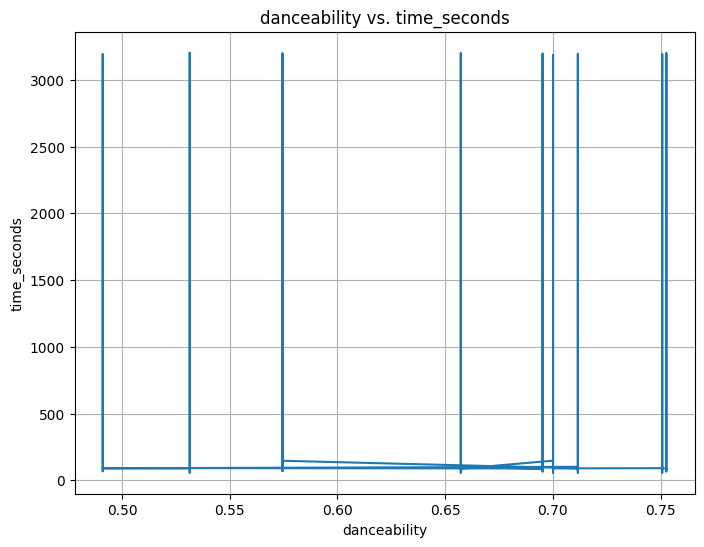

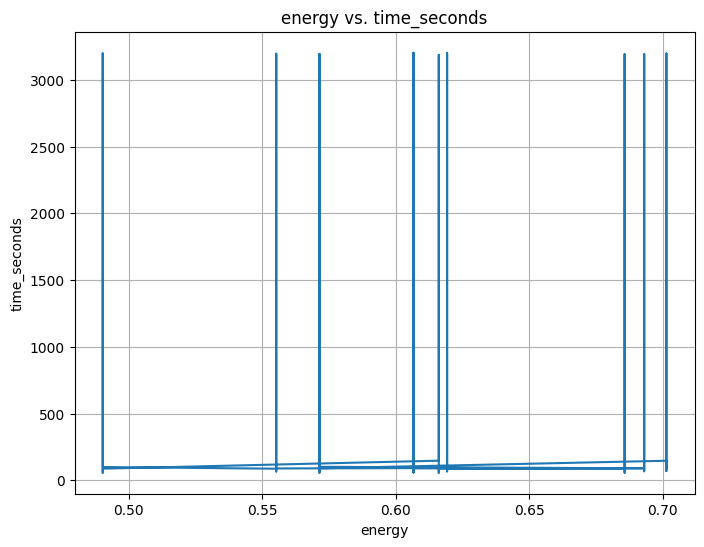

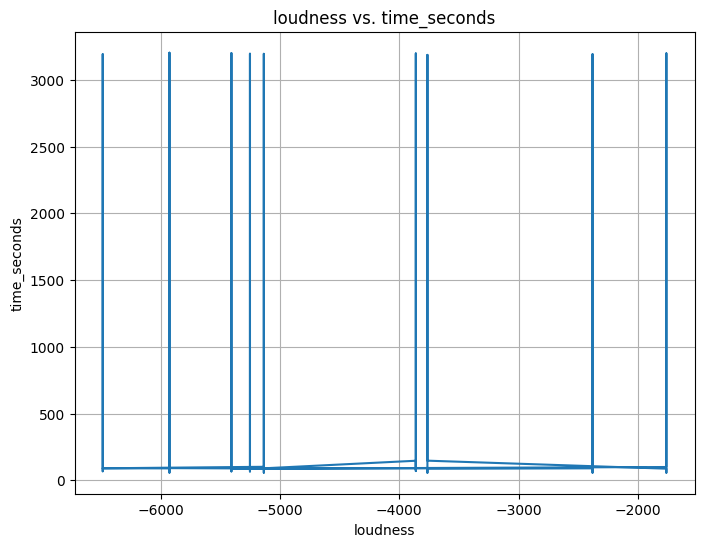

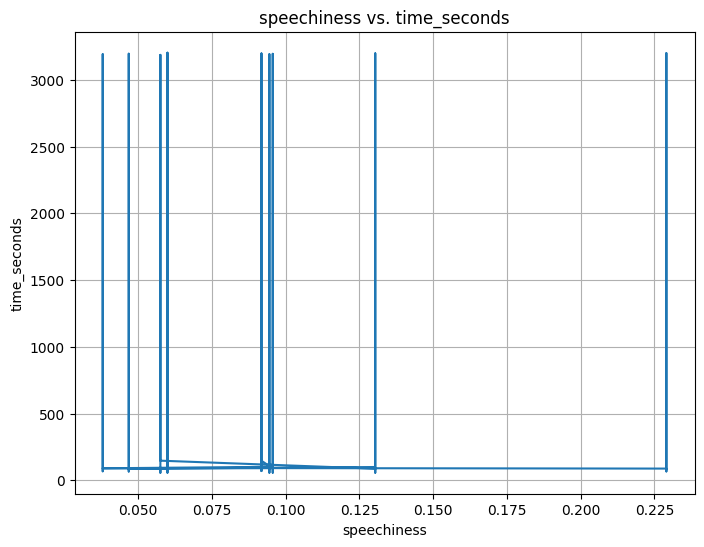

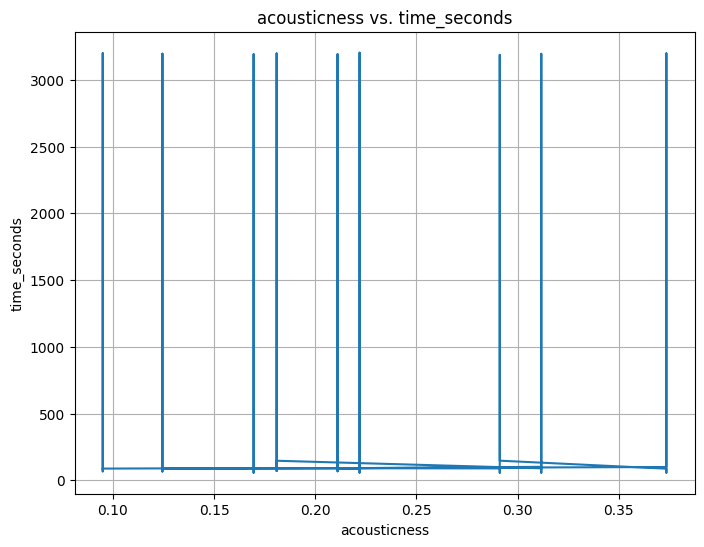

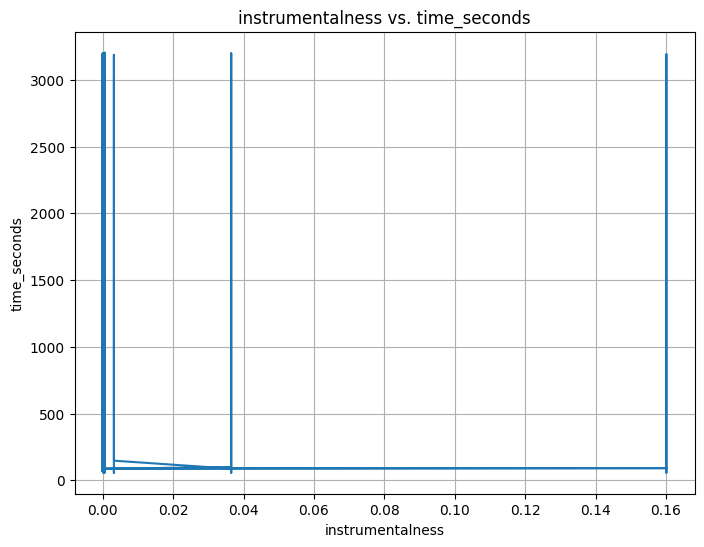

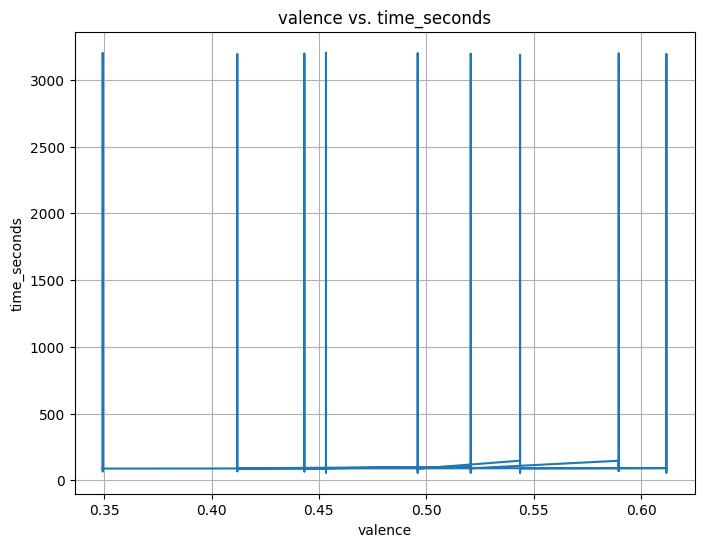

In [ ]:
# prompt: Using dataframe only_nums: create visualizations of each of the columns in only_nums with time_seconds using matplot with time_seconds as the dependent variable

import matplotlib.pyplot as plt

# Iterate through the columns in your DataFrame, excluding 'time_seconds' itself
for column in only_nums.columns:
    if column != 'time_seconds':
        # Create the plot
        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        plt.plot(only_nums[column], only_nums['time_seconds'])
        plt.xlabel(column)  # Set the x-axis label
        plt.ylabel('time_seconds')  # Set the y-axis label
        plt.title(f'{column} vs. time_seconds')  # Set the plot title
        plt.grid(True)  # Add a grid for better readability (optional)
        plt.show()


Multiple Regression Model

In [ ]:
# prompt: using the data in only nums, create a multiple regression model that accepts a dataframe as input and predicts time_seconds

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def create_and_train_model(df):
    """
    Creates and trains a multiple linear regression model.

    Args:
        df: Input DataFrame with features and target variable 'time_seconds'.

    Returns:
        A trained LinearRegression model.
    """

    # Separate features (X) and target (y)
    X = df.drop('time_seconds', axis=1)
    y = df['time_seconds']

    # Handle missing values (replace with the mean of the column)
    for col in X.columns:
        if X[col].isnull().any():
            X[col].fillna(X[col].mean(), inplace=True)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    return model

# Example usage (replace 'only_nums' with your actual DataFrame)
model = create_and_train_model(only_nums)

def predict_time(input_df, model):
    """
    Predicts 'time_seconds' using the trained model for new data.
    """

    # Make sure the input DataFrame has the same columns as the training data
    # excluding 'time_seconds' and handles missing values the same way.
    input_df = input_df[only_nums.drop('time_seconds', axis=1).columns]

    for col in input_df.columns:
        if input_df[col].isnull().any():
            input_df[col].fillna(input_df[col].mean(), inplace=True)

    predictions = model.predict(input_df)
    return predictions

# Example prediction:
# Assuming 'new_data' is a new DataFrame with the same features as 'only_nums'
# predictions = predict_time(new_data, model)
# print(predictions)


Mean Squared Error: 7211.8998378452925
R-squared: -0.0001487288653956309


Predict user performance

In [ ]:
# prompt: create a function that references all the other functions created already that does the following: accepts a user playlist url as input, summarizes the statistics for the user playlist in a dataframe, then uses the multiple regression model to predict the time_seconds

def analyze_playlist_and_predict(playlist_url):
    """
    Analyzes a user playlist, summarizes statistics, and predicts time_seconds.
    """
    try:
        playlist_df = get_playlist_tracks(playlist_url)
        merged_df = playlist_df.merge(combined, left_on='uri', right_on='id')
        merged_df = merged_df.drop(columns=['uri', 'name', 'artists', 'id', 'Title', 'Artist'])
        playlist_stats = merged_df.mean().to_frame().transpose()  # Create a DataFrame for stats

        # Add the 'driverId' column with the value 'user'
        playlist_stats['code'] = 'USER'

        # Prepare input for prediction (ensure columns match the model's training data)
        input_for_prediction = playlist_stats.reindex(columns=only_nums.drop('time_seconds', axis=1).columns, fill_value=0)

        # Predict time_seconds using the trained model
        predicted_time = predict_time(input_for_prediction, model)

        # Add the prediction to the playlist statistics
        playlist_stats['time_seconds'] = predicted_time

        return playlist_stats

    except Exception as e:
        print(f"An error occurred: {e}")
        return None


In [ ]:
analyze_playlist_and_predict("https://open.spotify.com/playlist/6iSp72jBfRxzsdmAbjOQUu?si=de810eda8eb74f6a")

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,code,time_seconds
0,0.700083,0.616083,-3764.14075,0.057542,0.291167,0.003175,0.543667,USER,95.897225


In [ ]:
prediction_df = analysis_df.drop(columns=['driverId', 'driverRef', 'playlists', 'raceId'])
prediction_df

,code,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,time_seconds
0,HAM,0.7527,0.6192,-5407.8637,0.22905,0.09494,8.250000e-07,0.34935,87.942
1,HAM,0.7527,0.6192,-5407.8637,0.22905,0.09494,8.250000e-07,0.34935,88.048
2,HAM,0.7527,0.6192,-5407.8637,0.22905,0.09494,8.250000e-07,0.34935,87.729
3,HAM,0.7527,0.6192,-5407.8637,0.22905,0.09494,8.250000e-07,0.34935,87.801
4,HAM,0.7527,0.6192,-5407.8637,0.22905,0.09494,8.250000e-07,0.34935,87.972
...,...,...,...,...,...,...,...,...,...
65487,MSC,0.5745,0.7013,-3861.4642,0.09180,0.18089,4.200000e-04,0.58960,94.483
65488,MSC,0.5745,0.7013,-3861.4642,0.09180,0.18089,4.200000e-04,0.58960,93.907
65489,MSC,0.5745,0.7013,-3861.4642,0.09180,0.18089,4.200000e-04,0.58960,92.570
65490,MSC,0.5745,0.7013,-3861.4642,0.09180,0.18089,4.200000e-04,0.58960,94.761


Formatting Cell

In [ ]:
def format_time(seconds):
    """Converts an integer representing seconds to minutes and seconds as a string with millisecond accuracy.

    Args:
        seconds (int): The total number of seconds.

    Returns:
        str: A string formatted as 'minutes:seconds.milliseconds'.
             The seconds part will have accuracy to the third decimal place.
    """
    minutes = seconds // 60
    remaining_seconds = seconds % 60
    return f"{int(minutes)}:{remaining_seconds:.3f}"

Final Predictor

In [ ]:
# prompt: create a function that combines the prediction dataframe and the analyze function, it should only take the user playlist url as input, it should return the dataframe with the added row

import pandas as pd
def combine_prediction_and_analyze(playlist_url):
    """
    Combines playlist analysis and prediction, adding results to the analysis_df.

    Args:
        playlist_url: The URL of the user's playlist.

    Returns:
        The updated analysis_df with the added row, or None if an error occurs.
    """
    try:
        playlist_stats = analyze_playlist_and_predict(playlist_url)
        if playlist_stats is not None:
            # Concatenate the playlist stats with the existing DataFrame
            global analysis_df # Access the global analysis_df
            clean_out = pd.concat([prediction_df, playlist_stats], ignore_index=True)
            clean_out = clean_out.groupby('code').mean()
            clean_final = clean_out.copy()
            clean_final = clean_final.sort_values(by='time_seconds')
            array = [i+1 for i in range(10)]
            clean_final['Position'] = array
            clean_final.reset_index(inplace=True)
            clean_final.set_index('Position', inplace=True)
            clean_final['Driver'] = clean_final.get('code')
            clean_final['Average Lap Time'] = clean_final['time_seconds'].apply(format_time)
            clean_final = clean_final.get(['Driver', 'Average Lap Time'])
            return clean_final
        else:
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


In [ ]:
combine_prediction_and_analyze("https://open.spotify.com/playlist/1ONGOZM6pvAtmGuaGE4sKc?si=0240eca573014a2e")

,Driver,Average Lap Time
Position,,
1,USER,1:34.633
2,VER,1:34.844
3,LEC,1:35.585
4,HAM,1:35.592
5,RIC,1:35.813
6,PER,1:35.884
7,STR,1:35.932
8,GAS,1:36.226
9,NOR,1:36.430


In [ ]:
def playlist_to_podium():
  playlist_url = input("Enter a playlist url: ")
  return combine_prediction_and_analyze(playlist_url)

# Leaderboard

In [ ]:
playlist_to_podium()

Enter a playlist url: https://open.spotify.com/playlist/5ShVA1UoRqhUG3xIbP3ULZ?si=eebcb2828a6548bf


,Driver,Average Lap Time
Position,,
1,VER,1:34.844
2,LEC,1:35.585
3,HAM,1:35.592
4,RIC,1:35.813
5,PER,1:35.884
6,STR,1:35.932
7,USER,1:36.190
8,GAS,1:36.226
9,NOR,1:36.430
